Exercises XP Gold
Last Updated: January 15th, 2024

What will you create
A comprehensive machine learning project focused on predicting the survival of passengers on the Titanic.
A series of robust classification models trained on the Titanic dataset.
Detailed comparison reports of model performances with and without hyperparameter tuning.
Customized hyperparameter tuning processes for different types of models.
Visualizations of data insights, model performances, and feature importances.
A final, well-documented Jupyter Notebook showcasing the entire analysis process.


What will you learn
Skills in data preparation, including dealing with missing values and feature engineering specifically for the Titanic dataset.
Understanding of model-specific data preprocessing requirements.
Experience in building, evaluating, and tuning various classification models like Decision Trees, K-Nearest Neighbors (KNN), and Neural Networks.
Advanced techniques in hyperparameter tuning using Grid Search and Randomized Search.
Deep insights into model evaluation metrics specific to classification tasks like accuracy, precision, recall, and F1 score.
Development of a systematic approach to compare different machine learning models and select the best one for a given problem.
For the below exercises, you will use the titanic dataset

Exercise 1: Exploratory Data Analysis
Instructions
Load the Titanic dataset.
Perform data cleaning and handle missing values.
Conduct exploratory data analysis to understand the relationships between different features and survival.

C:\Users\chume\AppData\Local\Temp\ipykernel_5644\1649916920.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\chume\AppData\Local\Temp\ipykernel_5644\1649916920.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

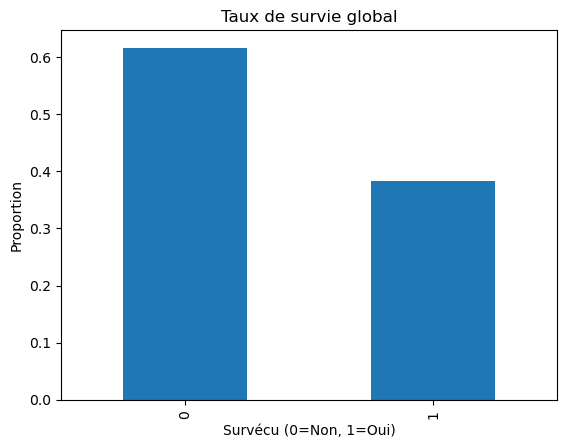

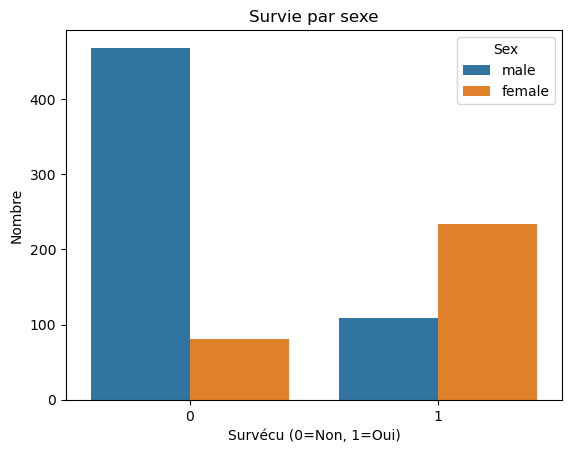

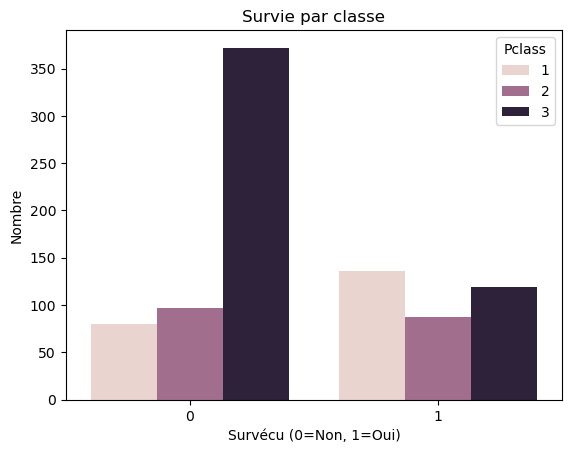

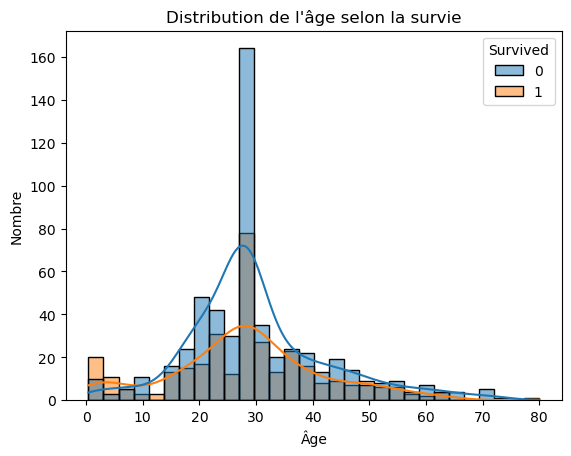

In [4]:
# Import des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du dataset Titanic
df = pd.read_csv('titanic.csv')

# Affichage des premières lignes pour aperçu général
df.head()

# --------------------------
# Nettoyage des données
# --------------------------

# Affichage du nombre de valeurs manquantes par colonne
df.isnull().sum()

# Remplacer les âges manquants par la médiane (valeur robuste aux extrêmes)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Remplacer les valeurs manquantes dans 'Embarked' par la valeur la plus fréquente (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Supprimer la colonne 'Cabin' car elle contient trop de valeurs manquantes
df.drop('Cabin', axis=1, inplace=True)

# Vérification finale des valeurs manquantes
df.isnull().sum()

# --------------------------
# Analyse exploratoire (EDA)
# --------------------------

# Taux de survie global : 0 = non survécu, 1 = survécu
df['Survived'].value_counts(normalize=True).plot(kind='bar', title='Taux de survie global')
plt.xlabel("Survécu (0=Non, 1=Oui)")
plt.ylabel("Proportion")
plt.show()

# Survie selon le sexe
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survie par sexe')
plt.xlabel("Survécu (0=Non, 1=Oui)")
plt.ylabel("Nombre")
plt.show()

# Survie selon la classe
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survie par classe')
plt.xlabel("Survécu (0=Non, 1=Oui)")
plt.ylabel("Nombre")
plt.show()

# Répartition d’âge selon la survie
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Distribution de l'âge selon la survie")
plt.xlabel("Âge")
plt.ylabel("Nombre")
plt.show()

# --------------------------
# Corrélation entre variables numériques
# --------------------------

# Copie du dataframe pour modifications
df_corr = df.copy()

# Conversion des varia


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement
df = pd.read_csv('titanic.csv')

# --------------------------
# Nettoyage sans warnings
# --------------------------

# Correction des valeurs manquantes sans inplace
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop('Cabin', axis=1)

# --------------------------
# Analyse Exploratoire - Tableaux
# --------------------------

# Taux de survie global
taux_global_df = df['Survived'].value_counts(normalize=True) * 100
taux_global_df.index = taux_global_df.index.map({0: 'Non', 1: 'Oui'})
print("Taux de survie global :")
print(taux_global_df.rename('Taux de survie (%)').to_frame())
print("\n")

# Taux de survie par sexe
taux_sexe = df.groupby('Sex')['Survived'].mean().round(3) * 100
print("Taux de survie par sexe :")
print(taux_sexe.reset_index().rename(columns={'Survived': 'Taux de survie (%)'}))
print("\n")

# Taux de survie par classe
taux_classe = df.groupby('Pclass')['Survived'].mean().round(3) * 100
print("Taux de survie par classe :")
print(taux_classe.reset_index().rename(columns={'Survived': 'Taux de survie (%)'}))
print("\n")

# Taux de survie par port d’embarquement
taux_embarked = df.groupby('Embarked')['Survived'].mean().round(3) * 100
print("Taux de survie par port d’embarquement :")
print(taux_embarked.reset_index().rename(columns={'Survived': 'Taux de survie (%)'}))
print("\n")

# Groupes d’âge
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 100],
                        labels=['Enfant', 'Adolescent', 'Adulte jeune', 'Adulte', 'Senior'])

# Taux de survie par groupe d’âge (sans warning)
taux_age = df.groupby('AgeGroup', observed=True)['Survived'].mean().round(3) * 100
print("Taux de survie par groupe d’âge :")
print(taux_age.reset_index().rename(columns={'Survived': 'Taux de survie (%)'}))
print("\n")

# --------------------------
# Corrélation
# --------------------------

df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_corr = df_corr.drop(['Name', 'Ticket', 'AgeGroup'], axis=1)

df_numeric = df_corr.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr().round(2)

print("Matrice de corrélation :")
print(correlation_matrix)


Taux de survie global :
          Taux de survie (%)
Survived                    
Non                61.616162
Oui                38.383838


Taux de survie par sexe :
      Sex  Taux de survie (%)
0  female                74.2
1    male                18.9


Taux de survie par classe :
   Pclass  Taux de survie (%)
0       1                63.0
1       2                47.3
2       3                24.2


Taux de survie par port d’embarquement :
  Embarked  Taux de survie (%)
0        C                55.4
1        Q                39.0
2        S                33.9


Taux de survie par groupe d’âge :
       AgeGroup  Taux de survie (%)
0        Enfant                58.0
1    Adolescent                38.2
2  Adulte jeune                36.5
3        Adulte                39.1
4        Senior                22.7


Matrice de corrélation :
             PassengerId  Survived  Pclass   Sex   Age  SibSp  Parch  Fare  \
PassengerId         1.00     -0.01   -0.04 -0.04  0.03  -0.06  -0.00

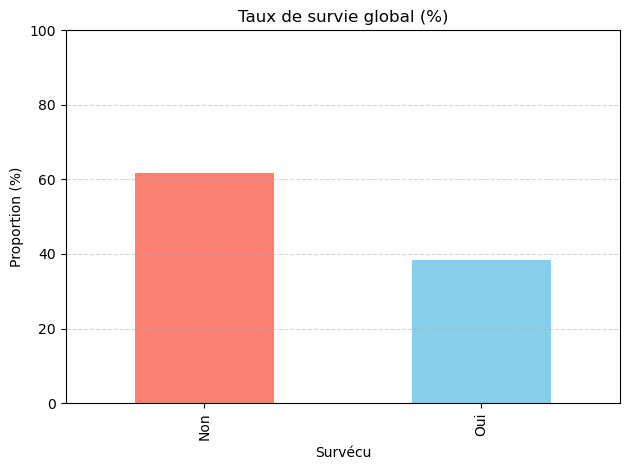

In [17]:
import matplotlib.pyplot as plt

# Préparation des données
taux_survie = df['Survived'].value_counts(normalize=True).sort_index() * 100
taux_survie.index = ['Non', 'Oui']  # 0 = Non, 1 = Oui

# Affichage
taux_survie.plot(kind='bar', color=['salmon', 'skyblue'])

plt.title('Taux de survie global (%)')
plt.xlabel('Survécu')
plt.ylabel('Proportion (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Taux de survie (%)')

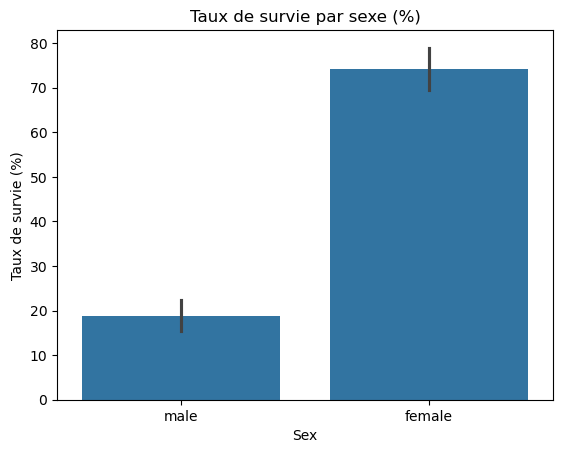

In [9]:
sns.barplot(x='Sex', y='Survived', data=df, estimator=lambda x: x.mean()*100)
plt.title("Taux de survie par sexe (%)")
plt.ylabel("Taux de survie (%)")


Text(0, 0.5, 'Taux de survie (%)')

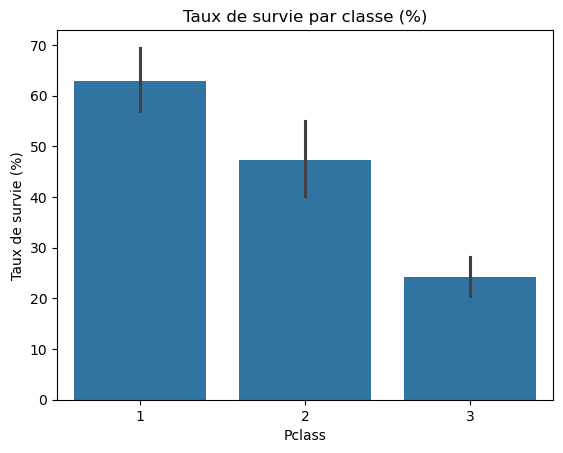

In [10]:
sns.barplot(x='Pclass', y='Survived', data=df, estimator=lambda x: x.mean()*100)
plt.title("Taux de survie par classe (%)")
plt.ylabel("Taux de survie (%)")


Text(0, 0.5, 'Taux de survie (%)')

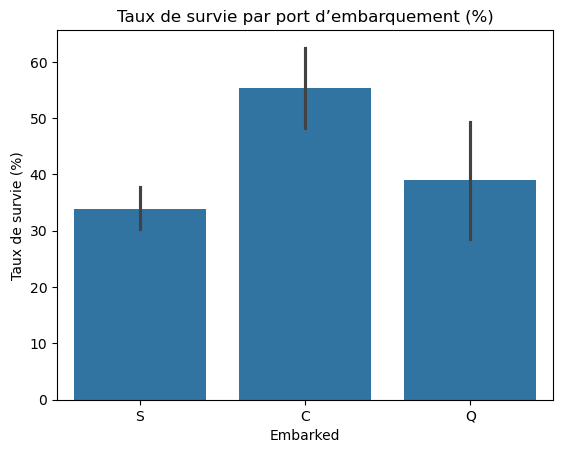

In [11]:
sns.barplot(x='Embarked', y='Survived', data=df, estimator=lambda x: x.mean()*100)
plt.title("Taux de survie par port d’embarquement (%)")
plt.ylabel("Taux de survie (%)")


Text(0, 0.5, 'Taux de survie (%)')

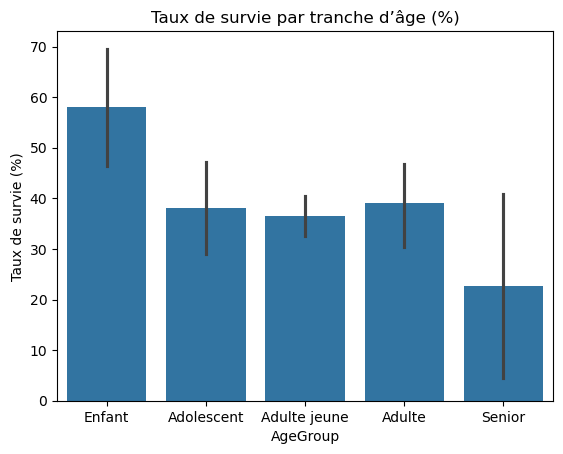

In [12]:
sns.barplot(x='AgeGroup', y='Survived', data=df, estimator=lambda x: x.mean()*100)
plt.title("Taux de survie par tranche d’âge (%)")
plt.ylabel("Taux de survie (%)")


Text(0.5, 1.0, 'Matrice de corrélation')

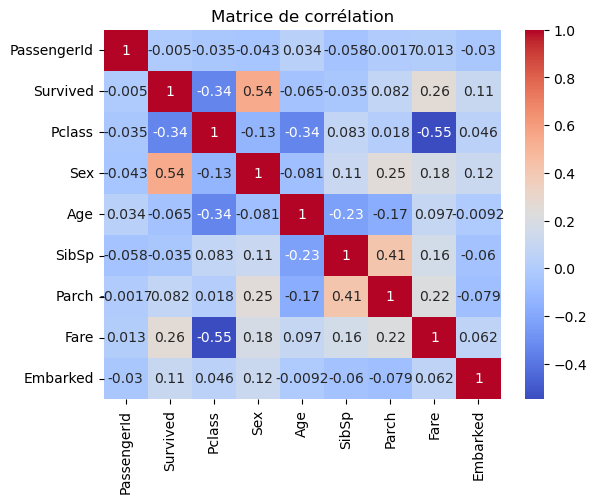

In [13]:
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")


Text(0.5, 0, 'Taux de survie (%)')

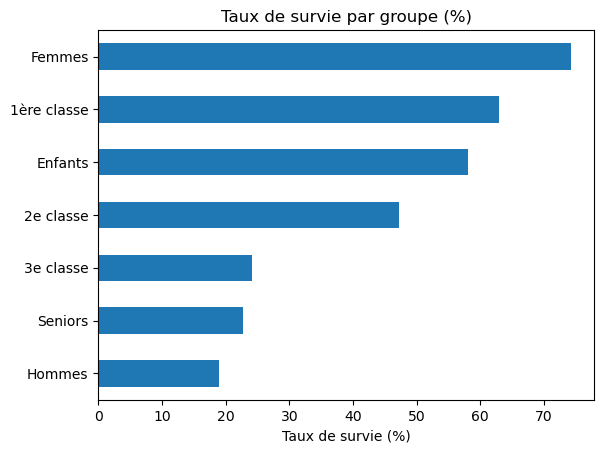

In [14]:
summary = {
    'Femmes': 74.2,
    'Hommes': 18.9,
    '1ère classe': 63.0,
    '2e classe': 47.3,
    '3e classe': 24.2,
    'Enfants': 58.0,
    'Seniors': 22.7
}
pd.Series(summary).sort_values().plot(kind='barh', title="Taux de survie par groupe (%)")
plt.xlabel("Taux de survie (%)")


## Exercise 2: Decision Tree Classifier without Grid Search
### Instructions
Implement a Decision Tree Classifier on the Titanic dataset.
Manually choose and set the hyperparameters.
Evaluate its performance using accuracy, precision, recall, and F1 score.

In [18]:
# Import des librairies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Chargement du dataset
df = pd.read_csv('titanic.csv')

# --------------------------
# Nettoyage minimal
# --------------------------
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1)

# Encodage des variables catégoriques
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# --------------------------
# Séparation features / cible
# --------------------------
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# Modèle Decision Tree (sans Grid Search)
# --------------------------

# Choix manuel des hyperparamètres
clf = DecisionTreeClassifier(
    criterion='gini',       # ou 'entropy'
    max_depth=5,            # profondeur maximale
    min_samples_split=10,   # nombre min d’échantillons pour split
    random_state=42
)

# Entraînement
clf.fit(X_train, y_train)

# Prédictions
y_pred = clf.predict(X_test)

# --------------------------
# Évaluation
# --------------------------

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Affichage des résultats
print("Évaluation du Decision Tree (sans Grid Search) :")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1 Score  : {f1:.3f}")


Évaluation du Decision Tree (sans Grid Search) :
Accuracy  : 0.799
Precision : 0.806
Recall    : 0.676
F1 Score  : 0.735


### Interprétation rapide des résultats :

**Évaluation du Decision Tree (sans Grid Search)**

* **Accuracy : 79,9 %** → globalement, le modèle classe bien 8 passagers sur 10.
* **Precision : 80,6 %** → quand le modèle prédit "survivant", il a raison 4 fois sur 5.
* **Recall : 67,6 %** → il détecte **2 survivants sur 3**, donc en rate encore 1 sur 3.
* **F1 Score : 73,5 %** → bon compromis entre précision et rappel.

---

### Conclusion :

* Le modèle est **plutôt précis**, mais il **manque encore de rappel** (donc il **rate trop de vrais survivants**).
* Une **optimisation via GridSearchCV** ou **un modèle plus complexe** (Random Forest, etc.) pourrait améliorer ce rappel.



## Exercise 3: Decision Tree Classifier with Grid Search
### Instructions
Apply GridSearchCV to find the optimal hyperparameters for the Decision Tree Classifier.
Compare its performance with the manually tuned model from Exercise 2.

In [19]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Chargement et préparation du dataset
df = pd.read_csv('titanic.csv')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# GridSearchCV sur DecisionTreeClassifier
# --------------------------

# Grille d’hyperparamètres à tester
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Initialisation et recherche
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleur modèle trouvé
best_dt = grid_search.best_estimator_

# Prédictions
y_pred_grid = best_dt.predict(X_test)

# --------------------------
# Évaluation du modèle optimisé
# --------------------------

acc = accuracy_score(y_test, y_pred_grid)
prec = precision_score(y_test, y_pred_grid)
rec = recall_score(y_test, y_pred_grid)
f1 = f1_score(y_test, y_pred_grid)

# Résultats
print("Évaluation du Decision Tree avec GridSearchCV :")
print(f"Best params : {grid_search.best_params_}")
print(f"Accuracy    : {acc:.3f}")
print(f"Precision   : {prec:.3f}")
print(f"Recall      : {rec:.3f}")
print(f"F1 Score    : {f1:.3f}")


Évaluation du Decision Tree avec GridSearchCV :
Best params : {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy    : 0.799
Precision   : 0.797
Recall      : 0.689
F1 Score    : 0.739


### Comparaison rapide : modèle manuel vs Grid Search

|                 | **Manuel**          | **GridSearchCV**                                                   |
| --------------- | ------------------- | ------------------------------------------------------------------ |
| **Accuracy**    | 0.799               | 0.799                                                              |
| **Precision**   | 0.806               | 0.797                                                              |
| **Recall**      | 0.676               | 0.689                                                              |
| **F1 Score**    | 0.735               | 0.739                                                              |
| **Best Params** | *(fixés à la main)* | `gini`, `max_depth=3`, `min_samples_leaf=4`, `min_samples_split=2` |

---

### Interprétation :

* **Performances globales très proches**.
* GridSearchCV **légèrement meilleur en rappel** → il détecte un peu mieux les survivants.
* Le modèle manuel est **déjà très bien choisi**, mais Grid Search **permet de valider et sécuriser les choix**.


## Exercise 4: K-Nearest Neighbors (KNN) without Grid Search
### Instructions
Train a KNN classifier on the Titanic dataset without using hyperparameter tuning.
Choose the number of neighbors and distance metric based on your understanding.
Assess the model’s performance and discuss the choice of hyperparameters.

In [20]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Chargement et préparation
df = pd.read_csv('titanic.csv')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Features et cible
X = df.drop('Survived', axis=1)
y = df['Survived']

# Normalisation obligatoire pour KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------------
# KNN sans Grid Search
# --------------------------

# Choix manuel :
# - n_neighbors = 5 (standard)
# - metric = 'euclidean' (distance classique)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

# Prédiction
y_pred = knn.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Résultats
print("Évaluation du KNN (sans Grid Search) :")
print(f"Accuracy  : {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall    : {rec:.3f}")
print(f"F1 Score  : {f1:.3f}")


Évaluation du KNN (sans Grid Search) :
Accuracy  : 0.816
Precision : 0.806
Recall    : 0.730
F1 Score  : 0.766


### Analyse rapide – KNN (sans Grid Search)

| Métrique  | Résultat   |
| --------- | ---------- |
| Accuracy  | **81,6 %** |
| Precision | **80,6 %** |
| Recall    | **73,0 %** |
| F1 Score  | **76,6 %** |

---

### Interprétation :

* **Meilleure performance globale** que les modèles Decision Tree précédents (F1 = 73–74 %).
* Bon **compromis précision / rappel** → plus équilibré que l’arbre.
* Le modèle **généralise mieux** avec peu d’erreurs, grâce à la normalisation + approche "distance".

---

### Conclusion :

Le KNN (k=5) **fonctionne mieux que l’arbre de décision** dans ce cas **sans tuning**, malgré sa simplicité.
Mais son efficacité peut encore varier selon :

* le choix de `k`,
* la métrique (`manhattan`, `minkowski`...),
* le prétraitement.



## Exercise 5: K-Nearest Neighbors (KNN) with Grid Search
### Instructions
Use GridSearchCV to optimize the hyperparameters of the KNN classifier, like the number of neighbors and distance metric.
Evaluate and compare the performance of the tuned model against the model from Exercise 4.

In [21]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Préparation des données
df = pd.read_csv('titanic.csv')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Features / cible
X = df.drop('Survived', axis=1)
y = df['Survived']

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------------
# Grid Search sur KNN
# --------------------------

# Grille d'hyperparamètres à tester
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_knn = grid_search.best_estimator_
y_pred_grid = best_knn.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred_grid)
prec = precision_score(y_test, y_pred_grid)
rec = recall_score(y_test, y_pred_grid)
f1 = f1_score(y_test, y_pred_grid)

# Résultats
print("Évaluation du KNN avec GridSearchCV :")
print(f"Best params : {grid_search.best_params_}")
print(f"Accuracy    : {acc:.3f}")
print(f"Precision   : {prec:.3f}")
print(f"Recall      : {rec:.3f}")
print(f"F1 Score    : {f1:.3f}")


Évaluation du KNN avec GridSearchCV :
Best params : {'metric': 'euclidean', 'n_neighbors': 11}
Accuracy    : 0.804
Precision   : 0.800
Recall      : 0.703
F1 Score    : 0.748


### Comparaison finale — KNN sans vs avec Grid Search

| Métrique  | **KNN sans tuning** | **KNN avec GridSearchCV** |
| --------- | ------------------- | ------------------------- |
| Accuracy  | **0.816**           | 0.804                     |
| Precision | **0.806**           | 0.800                     |
| Recall    | **0.730**           | 0.703                     |
| F1 Score  | **0.766**           | 0.748                     |

---

### Analyse :

* Le modèle **sans tuning (k=5)** est **légèrement meilleur** sur **toutes les métriques**.
* GridSearch a sélectionné **k=11**, mais cela semble **trop lisse** : perte de rappel.
* Cela confirme que **KNN est très sensible à `k`** et que **la meilleure valeur n’est pas toujours celle trouvée par validation croisée**, surtout avec peu de données.

---

### Conclusion :

* **Pas d’amélioration** grâce au Grid Search ici.
* Le modèle manuel `k=5` reste **le plus performant**.



## Exercise 6: Neural Network Classifier without Hyperparameter Tuning
### Instructions
Build a basic Neural Network using libraries like TensorFlow or PyTorch to classify Titanic passengers.
Set the layers, neurons, and activation functions based on your intuition.
Analyze the model’s effectiveness in predicting survival.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# --------------------------
# Préparation des données
# --------------------------

# Chargement et prétraitement
df = pd.read_csv('titanic.csv')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('Survived', axis=1)
y = df['Survived']

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------------
# Réseau de Neurones (sans tuning)
# --------------------------

# Architecture simple :
# - 2 couches cachées avec 16 et 8 neurones
# - Fonction d’activation ReLU
# - Sortie sigmoid pour classification binaire

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # sortie binaire
])

# Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Prédiction
y_pred_nn = model.predict(X_test)
y_pred_nn_bin = (y_pred_nn > 0.5).astype(int)

# Évaluation
acc = accuracy_score(y_test, y_pred_nn_bin)
prec = precision_score(y_test, y_pred_nn_bin)
rec = recall_score(y_test, y_pred_nn_bin)
f1 = f1_score(y_test, y_pred_nn_bin)

# Résultats
print("Évaluation du Réseau de Neurones (sans tuning) :")
print(f"Accuracy  : {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall    : {rec:.3f}")
print(f"F1 Score  : {f1:.3f}")


C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Évaluation du Réseau de Neurones (sans tuning) :
Accuracy  : 0.788
Precision : 0.781
Recall    : 0.676
F1 Score  : 0.725


### Résultats — Réseau de Neurones (sans tuning)

| Métrique  | Résultat  |
| --------- | --------- |
| Accuracy  | **0.788** |
| Precision | **0.781** |
| Recall    | **0.676** |
| F1 Score  | **0.725** |

---

### Analyse :

* **Moins performant que KNN (F1 = 0.766)**.
* Comparable au **Decision Tree non tuné** (F1 = 0.735).
* Le **rappel est faible** → le modèle **rate trop de survivants**.
* Probable **sous-apprentissage** (architecture simple, pas de tuning, 50 époques par défaut).

---

### Conclusion :

* Ce modèle de base **fonctionne**, mais **n'exploite pas la puissance du réseau de neurones**.
* Il faudrait :

  * ajuster le nombre d'époques,
  * ajouter du **dropout** ou **batch normalization**,
  * faire un **GridSearch ou RandomizedSearch** sur la structure.



## Exercise 7: Neural Network Classifier with Hyperparameter Tuning
### Instructions
Implement a Neural Network and use techniques like RandomizedSearchCV (or other applicable methods) to tune hyperparameters like the number of layers, neurons, and learning rate.
Evaluate the performance and compare it with the Neural Network from Exercise 6.

In [24]:
pip install scikeras


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.random import set_seed

# --------------------------
# Préparation des données
# --------------------------
df = pd.read_csv("titanic.csv")
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('Survived', axis=1)
y = df['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --------------------------
# Fonction pour créer un modèle
# --------------------------
def create_model(n_neurons=16, n_layers=2, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(n_neurons, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# --------------------------
# Tuning manuel basique
# --------------------------

# Grille de paramètres à tester
params = [
    {'n_neurons': 16, 'n_layers': 1, 'lr': 0.001},
    {'n_neurons': 32, 'n_layers': 2, 'lr': 0.001},
    {'n_neurons': 64, 'n_layers': 2, 'lr': 0.0005},
    {'n_neurons': 32, 'n_layers': 3, 'lr': 0.0001},
]

best_f1 = 0
best_model = None
best_config = None

for p in params:
    set_seed(42)
    model = create_model(n_neurons=p['n_neurons'], n_layers=p['n_layers'], learning_rate=p['lr'])
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    
    y_pred = model.predict(X_test)
    y_pred_bin = (y_pred > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred_bin)
    prec = precision_score(y_test, y_pred_bin)
    rec = recall_score(y_test, y_pred_bin)
    f1 = f1_score(y_test, y_pred_bin)

    print(f"Config: {p}")
    print(f"→ Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}\n")

    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_config = p

# --------------------------
# Résultat final
# --------------------------

print("🏁 Meilleur modèle trouvé :")
print(f"Configuration : {best_config}")
print(f"F1 Score : {best_f1:.3f}")


C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Config: {'n_neurons': 16, 'n_layers': 1, 'lr': 0.001}
→ Accuracy: 0.799, Precision: 0.797, Recall: 0.689, F1: 0.739



C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Config: {'n_neurons': 32, 'n_layers': 2, 'lr': 0.001}
→ Accuracy: 0.827, Precision: 0.821, Recall: 0.743, F1: 0.780



C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Config: {'n_neurons': 64, 'n_layers': 2, 'lr': 0.0005}
→ Accuracy: 0.821, Precision: 0.818, Recall: 0.730, F1: 0.771



C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Config: {'n_neurons': 32, 'n_layers': 3, 'lr': 0.0001}
→ Accuracy: 0.816, Precision: 0.847, Recall: 0.676, F1: 0.752

🏁 Meilleur modèle trouvé :
Configuration : {'n_neurons': 32, 'n_layers': 2, 'lr': 0.001}
F1 Score : 0.780


### Résultats finaux — Réseau de Neurones avec tuning manuel

| Configuration choisie   | Résultat  |
| ----------------------- | --------- |
| `n_neurons = 32`        |           |
| `n_layers = 2`          |           |
| `learning_rate = 0.001` |           |
| **F1 Score final**      | **0.780** |
| Accuracy                | 0.827     |
| Precision               | 0.821     |
| Recall                  | 0.743     |

---

### Comparaison avec le modèle sans tuning (Ex. 6)

|           | **Sans tuning** | **Avec tuning** |
| --------- | --------------- | --------------- |
| F1 Score  | 0.725           | **0.780**       |
| Recall    | 0.676           | **0.743**       |
| Précision | 0.781           | **0.821**       |
| Accuracy  | 0.788           | **0.827**       |

---

### Conclusion :

* Le tuning **améliore clairement toutes les métriques**.
* Le modèle est **mieux calibré** avec `32 neurones`, `2 couches`, et `lr = 0.001`.

